## List of Imports 

In [1]:
from __future__ import print_function, division

import requests
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import re 
from dateutil.parser import parse
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle

%matplotlib inline

/Users/liyuqiao/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Scraping 

In [2]:
# def create_soups(url):
#     response = requests.get(url)
#     page = response.text
#     soup = BeautifulSoup()

In [3]:
url_p1 = 'http://www.boxofficemojo.com/genres/chart/?id=3d.htm'

response_p1 = requests.get(url_p1)
page_p1 = response_p1.text
soup_p1 = BeautifulSoup(page_p1,"html5lib")

In [4]:
url_p2 = 'http://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=2&id=3d.htm'

response_p2 = requests.get(url_p2)
page_p2 = response_p2.text
soup_p2 = BeautifulSoup(page_p2,"html5lib")

In [5]:
url_p3 = 'http://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=3&id=3d.htm'

response_p3 = requests.get(url_p3)
page_p3 = response_p3.text
soup_p3 = BeautifulSoup(page_p3,"html5lib")

In [6]:
# 2D - Creature Feature 
url_p4 = 'http://www.boxofficemojo.com/genres/chart/?id=creaturefeature.htm&sort=date&order=DESC&p=.htm'

response_p4 = requests.get(url_p4)
page_p4 = response_p4.text
soup_p4 = BeautifulSoup(page_p4,"html5lib")

In [7]:
# 2D - Environmentalist 
url_p5 = 'http://www.boxofficemojo.com/genres/chart/?id=environment.htm&sort=date&order=DESC&p=.htm'
response_p5 = requests.get(url_p5)
page_p5 = response_p5.text
soup_p5 = BeautifulSoup(page_p5,"html5lib")

In [8]:
# 2D - Romantic Drama 
url_p6 = 'http://www.boxofficemojo.com/genres/chart/?id=romanticdrama.htm&sort=date&order=DESC&p=.htm'

response_p6 = requests.get(url_p6)
page_p6 = response_p6.text
soup_p6 = BeautifulSoup(page_p6,"html5lib")

In [9]:
# 2D - Disaster
url_p7 = 'http://www.boxofficemojo.com/genres/chart/?id=disaster.htm&sort=date&order=DESC&p=.htm'

response_p7 = requests.get(url_p7)
page_p7 = response_p7.text
soup_p7 = BeautifulSoup(page_p7,"html5lib")

In [10]:
# 2D - Action
url_p8 = 'http://www.boxofficemojo.com/genres/chart/?id=actionheroine.htm&sort=date&order=DESC&p=.htm'

response_p8 = requests.get(url_p8)
page_p8 = response_p8.text
soup_p8 = BeautifulSoup(page_p8,"html5lib")

In [11]:
# 2D - Fantasy 
url_p9 = 'http://www.boxofficemojo.com/genres/chart/?id=liveactionfantasy.htm&sort=date&order=DESC&p=.htm'

response_p9 = requests.get(url_p9)
page_p9 = response_p9.text
soup_p9 = BeautifulSoup(page_p9,"html5lib")

In [12]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p1 = [] 
for tr in soup_p1.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p1.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [13]:
# There are three links for each movie - only need the first link to its main page 
# Movies from 100 above are upcoming releases thus filtered out 
links_p1 = all_links_p1[::3][:100]
links_p1[90:100]

['http://www.boxofficemojo.com//movies/?id=cars3.htm',
 'http://www.boxofficemojo.com//movies/?id=pussinboots12.htm',
 'http://www.boxofficemojo.com//movies/?id=mastermind.htm',
 'http://www.boxofficemojo.com//movies/?id=hoteltransylvania.htm',
 'http://www.boxofficemojo.com//movies/?id=planetoftheapes16.htm',
 'http://www.boxofficemojo.com//movies/?id=greatgatsby2012.htm',
 'http://www.boxofficemojo.com//movies/?id=rio.htm',
 'http://www.boxofficemojo.com//movies/?id=kungfupanda3.htm',
 'http://www.boxofficemojo.com//movies/?id=smurfs.htm',
 'http://www.boxofficemojo.com//movies/?id=christmascarol09.htm']

In [14]:
def get_movie_value(soup, field_name):
        '''Grab a value from boxofficemojo HTML

        Takes a string attribute of a movie on the page and
        returns the string in the next sibling object
        (the value for that attribute)
        or None if nothing is found.
        '''
        obj = soup.find(text=re.compile(field_name))
        if not obj: 
            return None
        next_sibling = obj.findNextSibling()
        if next_sibling:
            return next_sibling.text 
        else:
            return None

def find_box1_info(soup):
    if soup.findAll('div',{'class':'mp_box_content'}):
        boxes = soup.findAll('div',{'class':'mp_box_content'})
        box1_rows = [row for row in boxes[1].find_all('tr')] 
        box1 = box1_rows[:25]
        return box1
    else: 
        return None  
    
def find_box2_info(soup):
    if soup.findAll('div',{'class':'mp_box_content'}):
        boxes = soup.findAll('div',{'class':'mp_box_content'})
        box2_rows = [row for row in boxes[2].find_all('tr')]    
        return box2_rows
    else: 
        return None 

In [15]:
title_p1 = []
raw_domestic_total_gross_p1 = []
raw_release_date_p1 = []
raw_runtime_p1 = []
rating_p1 = []
raw_pro_budget_p1 = []
find_box1_p1 = []
find_box2_p1 = []
raw_opening_gross_p1 = []

    
for link in links_p1: 
    source_code1 = requests.get(link)
    soup1=BeautifulSoup(source_code1.text, 'html5lib')
    
    find_box1_p1.append(find_box1_info(soup1))
    find_box2_p1.append(find_box2_info(soup1))
    
    
    raw_opening_wknd_gross = find_box1_info(soup1)[0].find_all('td')[1].text
    raw_opening_gross_p1.append(raw_opening_wknd_gross)
    
    title_string = soup1.find('title').text
    title_p1.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup1,'Domestic Total')
    raw_domestic_total_gross_p1.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup1,'Release Date')
    raw_release_date_p1.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup1,'Runtime')
    raw_runtime_p1.append(raw_run_time)

    rating_string = get_movie_value(soup1,'MPAA Rating')
    rating_p1.append(rating_string)
    
    pro_budget = get_movie_value(soup1, 'Production Budget')
    raw_pro_budget_p1.append(pro_budget)

In [16]:
%%capture
title_p1

In [17]:
%%capture
raw_directors_p1=[]
for box in find_box2_p1:
    raw_directors_p1.append(box[0].text)
raw_directors_p1[75] = 'Directors:Phil LordChristopher Miller'
raw_directors_p1[84] = 'Directors:Carlos SaldanhaMike Thurmeier'
raw_directors_p1[90] = 'Director:Brian Fee'
directors_p1 = [str(raw.split(':')[1]) for raw in raw_directors_p1]
directors_p1[6] = 'Angus MacLane Andrew Stanton'
directors_p1[11] = 'Anthony Russo Joe Russo'
directors_p1[12] = 'Chris Buck Jennifer Lee'
directors_p1[16] = 'Pierre Coffin Chris Renaud'
directors_p1[20] = 'Byron Howard Rich Moore'
directors_p1[28] = 'Pete Docter Bob Peterson'
directors_p1[35] = 'Anthony Russo Joe Russo'
directors_p1[39] = 'Pierre Coffin Chris Renaud'
directors_p1[40] = 'Ron Clements John Musker'
directors_p1[45] = 'Mark Andrews Brenda Chapman'
directors_p1[53] = 'Dean DeBlois Chris Sanders'
directors_p1[60] = 'Nathan Greno Byron Howard'
directors_p1[62] = 'Rob Letterman Conrad Vernon'
directors_p1[64] = 'John Lasseter Brad Lewis'
directors_p1[67] = 'Kirk De Micco Chris Sanders'
directors_p1[75] = 'Phil Lord Christopher Miller'
directors_p1[77] = 'Joachim Ronning Espen Sandberg'
directors_p1[83] = 'Mike Mitchell Paul Tibbitt'
directors_p1[84] = 'Carlos Saldanha Mike Thurmeier'
directors_p1[97] = 'Alessandro Carloni Jennifer Yuh Nelson'
directors_p1

In [18]:
raw_actors_p1 = []
for box in find_box2_p1:
    if len(box) > 3: 
        raw_actors_p1.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p1.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p1.append(box[1].text)
    else: 
        raw_actors_p1.append(box[0].text)
raw_actors_p1 = [str(raw.split(':')[1]) for raw in raw_actors_p1]
raw_actors_p1[92] = 'Will Ferrell (Voice)Brad Pitt (Voice)Tina Fey (Voice)Jonah Hill (Voice)David Cross (Voice)Justin Theroux (Voice)Ben Stiller (Voice)Tom McGrath* (Voice)J.K. Simmons (Voice)'

In [19]:
%%capture
for i, raw in enumerate(raw_actors_p1):
    if raw.count('(Voice)') > len(raw.split())/3:
        raw_actors_p1[i] = "Animation"
raw_actors_p1[3] = 'Robert Downey, Jr.Chris HemsworthChris EvansJeremy RennerMark RuffaloScarlett JohanssonClark GreggSamuel L. JacksonCobie SmuldersTom HiddlestonStellan SkarsgardGwyneth Paltrow'
raw_actors_p1[4] = 'Felicity JonesMads MikkelsenBen MendelsohnDonnie YenForest WhitakerDiego LunaRiz Ahmed'
raw_actors_p1[7] = 'Robert Downey, Jr.Chris HemsworthMark RuffaloChris EvansScarlett JohanssonJeremy RennerDon CheadleAaron JohnsonElizabeth OlsenPaul BettanyCobie SmuldersAnthony MackieHayley AtwellIdris ElbaStellan Skarsgard'
raw_actors_p1[10] = 'Fan BingbingRobert Downey, Jr.Gwyneth PaltrowDon CheadleGuy PearceRebecca HallJames Badge DaleJon FavreauBen Kingsley'
raw_actors_p1[13] = 'Chris PrattZoe SaldanaDave Bautista'
raw_actors_p1[19] = 'Shia LaBeoufRosie Huntington-WhiteleyJosh DuhamelTyrese GibsonFrances McDormandPatrick DempseyJohn MalkovichAlan TudykKen JeongJohn Turturro'
raw_actors_p1[22] = 'Mia WasikowskaJohnny DeppHelena Bonham CarterAnne HathawayCrispin Glover'
raw_actors_p1[23] = 'Chris PrattZoe SaldanaDave BautistaLee PaceKaren GillanDjimon HounsouJohn C. ReillyGlenn CloseBenicio Del ToroJosh Brolin'
raw_actors_p1[27] = 'Martin FreemanIan McKellenRichard ArmitageCate BlanchettHugo WeavingChristopher Lee*Ian Holm*Elijah Wood*'
raw_actors_p1[36] = 'Martin FreemanIan McKellenRichard ArmitageOrlando BloomEvangeline LillyLuke EvansLee PaceCate Blanchett'
raw_actors_p1[38] = 'Ian McKellenMartin FreemanRichard ArmitageLee PaceLuke EvansOrlando BloomEvangeline LillyHugo WeavingChristopher LeeCate Blanchett'
raw_actors_p1[46] = 'Tony CoxJames FrancoMila KunisMichelle Williams'
raw_actors_p1[65] = 'Megan FoxWill ArnettWilliam Fichtner'
raw_actors_p1[98] = 'Neil Patrick HarrisJayma MaysHank Azaria'
raw_actors_p1

In [20]:
%%capture
actors_p1 = []
for a in raw_actors_p1:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p1.append(a)   
actors_p1 = [[name.strip().replace('*','').replace(' ','').replace('(','').replace('Voice)','').replace(')','') for name in actor] for actor in actors_p1] 
actors_p1 

In [21]:
%%capture
domestic_total_gross_p1 = []
for dtg in raw_domestic_total_gross_p1:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p1.append(dtg)
domestic_total_gross_p1[9] = int(412038809)  
domestic_total_gross_p1[24] = int(332003538)
domestic_total_gross_p1[34] = int(261863570)
domestic_total_gross_p1[76] = int(174980616)
domestic_total_gross_p1[90] = int(152412453)
domestic_total_gross_p1[94] = int(146288952)
domestic_total_gross_p1

In [22]:
%%capture
raw_theater_p1 = []
for box in find_box1_p1:
    raw_theater_p1.append((box[1].find_all('td')[0].text.split()[2]))
raw_theater_p1[12]='3,742'
theater_p1 = [int(raw.replace(',','')) for raw in raw_theater_p1]
theater_p1

In [23]:
%%capture
runtime_p1=[]
for rt in raw_runtime_p1: 
    rt = rt.split()
    minutes = int(rt[0])*60 + int(rt[2])
    rt = minutes 
    runtime_p1.append(rt)
runtime_p1

In [24]:
%%capture
raw_opening_gross_p1[12]= '\xa0$67,391,326'
opening_weekend_gross_p1 = []
for row in raw_opening_gross_p1:
    row = int(row.strip().replace('$','').replace(',',''))
    opening_weekend_gross_p1.append(row)
opening_weekend_gross_p1

In [25]:
%%capture
release_date_p1=[]
for rd in raw_release_date_p1:
    rd = parse(rd)
    release_date_p1.append(rd)
release_date_p1

In [26]:
%%capture
rating_p1

In [27]:
%%capture
prod_budget_p1 = []
for budget in raw_pro_budget_p1: 
    if budget == 'N/A':
        pass
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p1.append(budget)
prod_budget_p1[14]=int(250)
prod_budget_p1[6]=int(200)
prod_budget_p1[20]=int(150)
prod_budget_p1[27]=int(250)
prod_budget_p1[32]=int(200)
prod_budget_p1[36]=int(217)
prod_budget_p1[38]=int(250)
prod_budget_p1[40]=int(150)
prod_budget_p1[58]=int(200)
prod_budget_p1[76]=int(125)
prod_budget_p1[90]=int(175)
production_budget_p1 = []
for i in prod_budget_p1:
    i = int(i*1000000)
    production_budget_p1.append(i)
production_budget_p1

In [28]:
movies_p1 = {}
genre = ['3D'] * 100
headers = ['Movie Title',
           'Genre',
           'Domestic Total Gross ($)',
           'Release Date', 
           'Runtime (mins)', 
           'Wildest Release',
           'Rating',
           'Production Budget ($)',
           'Directors',
           'Actors', 
           'Opening Weekend Gross ($)']
movies_p1 = dict(zip(headers, [title_p1,
                            genre,
                            domestic_total_gross_p1,
                            release_date_p1,
                            runtime_p1,
                            theater_p1,
                            rating_p1,
                            production_budget_p1,
                            directors_p1,
                            actors_p1,
                            opening_weekend_gross_p1]))
df_p1 = pd.DataFrame(movies_p1)
df_p1 = df_p1[['Movie Title', 
            'Genre',
            'Release Date', 
            'Runtime (mins)',
            'Wildest Release',
            'Rating',
            'Directors',
            'Actors',
            'Production Budget ($)',
            'Opening Weekend Gross ($)',
            'Domestic Total Gross ($)']]

In [29]:
%%capture
df_p1

In [30]:
%%capture
print(soup_p2.prettify())

In [31]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p2 = [] 
for tr in soup_p2.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p2.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [32]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p4 = [] 
for tr in soup_p4.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p4.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [33]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p5 = [] 
for tr in soup_p5.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p5.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [34]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p6 = [] 
for tr in soup_p6.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p6.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [35]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p7 = [] 
for tr in soup_p7.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p7.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [36]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p8 = [] 
for tr in soup_p8.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p8.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [37]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p9 = [] 
for tr in soup_p9.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p9.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [38]:
links_p4 = all_links_p4[:21][::3] + all_links_p4[36:75][::3]
# links_p4

In [39]:
links_p5 = all_links_p5[21:66][::3]
# links_p5

In [40]:
links_p6 = all_links_p6[:21][::3] + all_links_p6[24:81][::3] + all_links_p6[84:204][::3]
# links_p6

In [41]:
links_p7 = all_links_p7[:75][::3]
# links_p7

In [42]:
links_p8 = all_links_p8[:27][::3] + all_links_p8[36:81][::3]
# links_p8

In [43]:
links_p9 = (all_links_p9[:21][::3] 
            + all_links_p9[24:75][::3] 
            + all_links_p9[78:90][::3] 
            + all_links_p9[96:108][::3] 
            + all_links_p9[135:213][::3]) 
# links_p9

In [44]:
links_p2 = all_links_p2[::3][:100]
len(links_p2)

100

In [45]:
title_p2 = []
raw_domestic_total_gross_p2 = []
raw_release_date_p2 = []
raw_runtime_p2 = []
rating_p2 = []
raw_pro_budget_p2 = []
find_box1_p2 = []
find_box2_p2 = []
raw_opening_gross_p2 = []

for link in links_p2: 
    source_code2 = requests.get(link)
    soup2=BeautifulSoup(source_code2.text, 'html5lib')
    
    find_box1_p2.append(find_box1_info(soup2))
    find_box2_p2.append(find_box2_info(soup2))
    
    
    raw_opening_wknd_gross = find_box1_info(soup2)[0].find_all('td')[1].text
    raw_opening_gross_p2.append(raw_opening_wknd_gross)
    
    title_string = soup2.find('title').text
    title_p2.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup2,'Domestic Total')
    raw_domestic_total_gross_p2.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup2,'Release Date')
    raw_release_date_p2.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup2,'Runtime')
    raw_runtime_p2.append(raw_run_time)

    rating_string = get_movie_value(soup2,'MPAA Rating')
    rating_p2.append(rating_string)
    
    pro_budget = get_movie_value(soup2, 'Production Budget')
    raw_pro_budget_p2.append(pro_budget)

In [46]:
title_p4 = []
raw_domestic_total_gross_p4 = []
raw_release_date_p4 = []
raw_runtime_p4 = []
rating_p4 = []
raw_pro_budget_p4 = []
find_box1_p4 = []
find_box2_p4 = []
raw_opening_gross_p4 = []

for link in links_p4: 
    source_code4 = requests.get(link)
    soup4=BeautifulSoup(source_code4.text, 'html5lib')
    
    find_box1_p4.append(find_box1_info(soup4))
    find_box2_p4.append(find_box2_info(soup4))
    
    
    raw_opening_wknd_gross = find_box1_info(soup4)[0].find_all('td')[1].text
    raw_opening_gross_p4.append(raw_opening_wknd_gross)
    
    title_string = soup4.find('title').text
    title_p4.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup4,'Domestic Total')
    raw_domestic_total_gross_p4.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup4,'Release Date')
    raw_release_date_p4.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup4,'Runtime')
    raw_runtime_p4.append(raw_run_time)

    rating_string = get_movie_value(soup4,'MPAA Rating')
    rating_p4.append(rating_string)
    
    pro_budget = get_movie_value(soup4, 'Production Budget')
    raw_pro_budget_p4.append(pro_budget)

In [47]:
title_p5 = []
raw_domestic_total_gross_p5 = []
raw_release_date_p5 = []
raw_runtime_p5 = []
rating_p5 = []
raw_pro_budget_p5 = []
find_box1_p5 = []
find_box2_p5 = []
raw_opening_gross_p5 = []

for link in links_p5: 
    source_code5 = requests.get(link)
    soup5=BeautifulSoup(source_code5.text, 'html5lib')
    
    find_box1_p5.append(find_box1_info(soup5))
    find_box2_p5.append(find_box2_info(soup5))
    
    raw_opening_wknd_gross = find_box1_info(soup5)[0].find_all('td')[1].text
    raw_opening_gross_p5.append(raw_opening_wknd_gross)
    
    title_string = soup5.find('title').text
    title_p5.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup5,'Domestic Total')
    raw_domestic_total_gross_p5.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup5,'Release Date')
    raw_release_date_p5.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup5,'Runtime')
    raw_runtime_p5.append(raw_run_time)

    rating_string = get_movie_value(soup5,'MPAA Rating')
    rating_p5.append(rating_string)
    
    pro_budget = get_movie_value(soup5, 'Production Budget')
    raw_pro_budget_p5.append(pro_budget)

In [48]:
title_p6 = []
raw_domestic_total_gross_p6 = []
raw_release_date_p6 = []
raw_runtime_p6 = []
rating_p6 = []
raw_pro_budget_p6 = []
find_box1_p6 = []
find_box2_p6 = []
raw_opening_gross_p6 = []

for link in links_p6: 
    source_code6 = requests.get(link)
    soup6=BeautifulSoup(source_code6.text, 'html5lib')
    
    find_box1_p6.append(find_box1_info(soup6))
    find_box2_p6.append(find_box2_info(soup6))
    
    raw_opening_wknd_gross = find_box1_info(soup6)[0].find_all('td')[1].text
    raw_opening_gross_p6.append(raw_opening_wknd_gross)
    
    title_string = soup6.find('title').text
    title_p6.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup6,'Domestic Total')
    raw_domestic_total_gross_p6.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup6,'Release Date')
    raw_release_date_p6.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup6,'Runtime')
    raw_runtime_p6.append(raw_run_time)

    rating_string = get_movie_value(soup6,'MPAA Rating')
    rating_p6.append(rating_string)
    
    pro_budget = get_movie_value(soup6, 'Production Budget')
    raw_pro_budget_p6.append(pro_budget)

In [49]:
title_p7 = []
raw_domestic_total_gross_p7 = []
raw_release_date_p7 = []
raw_runtime_p7 = []
rating_p7 = []
raw_pro_budget_p7 = []
find_box1_p7 = []
find_box2_p7 = []
raw_opening_gross_p7 = []

for link in links_p7: 
    source_code7 = requests.get(link)
    soup7=BeautifulSoup(source_code7.text, 'html5lib')
    
    find_box1_p7.append(find_box1_info(soup7))
    find_box2_p7.append(find_box2_info(soup7))
    
    raw_opening_wknd_gross = find_box1_info(soup7)[0].find_all('td')[1].text
    raw_opening_gross_p7.append(raw_opening_wknd_gross)
    
    title_string = soup7.find('title').text
    title_p7.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup7,'Domestic Total')
    raw_domestic_total_gross_p7.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup7,'Release Date')
    raw_release_date_p7.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup7,'Runtime')
    raw_runtime_p7.append(raw_run_time)

    rating_string = get_movie_value(soup7,'MPAA Rating')
    rating_p7.append(rating_string)
    
    pro_budget = get_movie_value(soup7, 'Production Budget')
    raw_pro_budget_p7.append(pro_budget)

In [50]:
title_p8 = []
raw_domestic_total_gross_p8 = []
raw_release_date_p8 = []
raw_runtime_p8 = []
rating_p8 = []
raw_pro_budget_p8 = []
find_box1_p8 = []
find_box2_p8 = []
raw_opening_gross_p8 = []

for link in links_p8: 
    source_code8 = requests.get(link)
    soup8=BeautifulSoup(source_code8.text, 'html5lib')
    
    find_box1_p8.append(find_box1_info(soup8))
    find_box2_p8.append(find_box2_info(soup8))
    
    raw_opening_wknd_gross = find_box1_info(soup8)[0].find_all('td')[1].text
    raw_opening_gross_p8.append(raw_opening_wknd_gross)
    
    title_string = soup8.find('title').text
    title_p8.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup8,'Domestic Total')
    raw_domestic_total_gross_p8.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup8,'Release Date')
    raw_release_date_p8.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup8,'Runtime')
    raw_runtime_p8.append(raw_run_time)

    rating_string = get_movie_value(soup8,'MPAA Rating')
    rating_p8.append(rating_string)
    
    pro_budget = get_movie_value(soup8, 'Production Budget')
    raw_pro_budget_p8.append(pro_budget)

In [51]:
title_p9 = []
raw_domestic_total_gross_p9 = []
raw_release_date_p9 = []
raw_runtime_p9 = []
rating_p9 = []
raw_pro_budget_p9 = []
find_box1_p9 = []
find_box2_p9 = []
raw_opening_gross_p9 = []

for link in links_p9: 
    source_code9 = requests.get(link)
    soup9=BeautifulSoup(source_code9.text, 'html5lib')
    
    find_box1_p9.append(find_box1_info(soup9))
    find_box2_p9.append(find_box2_info(soup9))
    
    raw_opening_wknd_gross = find_box1_info(soup9)[0].find_all('td')[1].text
    raw_opening_gross_p9.append(raw_opening_wknd_gross)
    
    title_string = soup9.find('title').text
    title_p9.append(title_string.split('(')[0].strip()) 
    
    raw_dtg = get_movie_value(soup9,'Domestic Total')
    raw_domestic_total_gross_p9.append(raw_dtg)
    
    raw_releasedate = get_movie_value(soup9,'Release Date')
    raw_release_date_p9.append(raw_releasedate)
    
    raw_run_time = get_movie_value(soup9,'Runtime')
    raw_runtime_p9.append(raw_run_time)

    rating_string = get_movie_value(soup9,'MPAA Rating')
    rating_p9.append(rating_string)
    
    pro_budget = get_movie_value(soup9, 'Production Budget')
    raw_pro_budget_p9.append(pro_budget)

In [52]:
%%capture
title_p2

In [53]:
%%capture
title_p4

In [54]:
%%capture
title_p5

In [55]:
%%capture
title_p6

In [56]:
%%capture
title_p7

In [57]:
%%capture
title_p8

In [58]:
%%capture
title_p9

In [59]:
%%capture
rating_p2

In [60]:
%%capture
rating_p4

In [61]:
%%capture
rating_p5

In [62]:
%%capture
rating_p6

In [63]:
%%capture
rating_p7

In [64]:
%%capture
rating_p8

In [65]:
%%capture
rating_p9

In [66]:
%%capture
release_date_p2=[]
for rd in raw_release_date_p2:
    rd = parse(rd)
    release_date_p2.append(rd)
release_date_p2

In [67]:
%%capture
release_date_p4=[]
for rd in raw_release_date_p4:
    rd = parse(rd)
    release_date_p4.append(rd)
release_date_p4

In [68]:
%%capture
release_date_p5=[]
for rd in raw_release_date_p5:
    rd = parse(rd)
    release_date_p5.append(rd)
release_date_p5

In [69]:
%%capture
release_date_p6=[]
for rd in raw_release_date_p6:
    rd = parse(rd)
    release_date_p6.append(rd)
release_date_p6

In [70]:
%%capture
release_date_p7=[]
for rd in raw_release_date_p7:
    rd = parse(rd)
    release_date_p7.append(rd)
release_date_p7

In [71]:
%%capture
release_date_p8=[]
for rd in raw_release_date_p8:
    rd = parse(rd)
    release_date_p8.append(rd)
release_date_p8

In [72]:
%%capture
release_date_p9=[]
for rd in raw_release_date_p9:
    rd = parse(rd)
    release_date_p9.append(rd)
release_date_p9

In [73]:
%%capture
runtime_p2=[]
for rt in raw_runtime_p2: 
    rt = rt.split()
    minutes = int(rt[0])*60 + int(rt[2])
    rt = minutes 
    runtime_p2.append(rt)
runtime_p2

In [74]:
# %%capture
runtime_p4=[]
for rt in raw_runtime_p4: 
    if rt == 'N/A':
        runtime_p4.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p4.append(rt)
# runtime_p4

In [75]:
%%capture
runtime_p5=[]
for rt in raw_runtime_p5: 
    if rt == 'N/A':
        runtime_p5.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p5.append(rt)
runtime_p5        

In [76]:
%%capture
runtime_p6=[]
for rt in raw_runtime_p6: 
    if rt == 'N/A':
        runtime_p6.append(None)
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p6.append(rt)
runtime_p6 

In [77]:
%%capture
runtime_p7=[]
for rt in raw_runtime_p7: 
    if rt == 'N/A':
        runtime_p7.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p7.append(rt)
runtime_p7 

In [78]:
%%capture
runtime_p8=[]
for rt in raw_runtime_p8: 
    if rt == 'N/A':
        runtime_p8.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p8.append(rt)
runtime_p8 

In [79]:
%%capture
runtime_p9=[]
for rt in raw_runtime_p9: 
    if rt == 'N/A':
        runtime_p9.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p9.append(rt)
runtime_p9 

In [80]:
%%capture
raw_opening_gross_p2[95]= '\xa0$13,242,895'
opening_weekend_gross_p2 = []
for row in raw_opening_gross_p2:
    row = int(row.strip().replace('$','').replace(',',''))
    opening_weekend_gross_p2.append(row)
opening_weekend_gross_p2

In [81]:
%%capture
opening_weekend_gross_p4 = []
# for i, row in enumerate(raw_opening_gross_p4):
#     print(i,row)
for row in raw_opening_gross_p4:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p4.append(row)
opening_weekend_gross_p4

In [82]:
%%capture
opening_weekend_gross_p5 = []
# for i, row in enumerate(raw_opening_gross_p5):
#     print(i,row)
for row in raw_opening_gross_p5:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p5.append(row)
opening_weekend_gross_p5

In [132]:
%%capture
opening_weekend_gross_p6 = []
raw_opening_gross_p6[63] = '\xa0$168,051'
for row in raw_opening_gross_p6:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p6.append(row)
opening_weekend_gross_p6

In [84]:
%%capture
opening_weekend_gross_p7 = []
raw_opening_gross_p7[18] = '\xa0$143,818'
for row in raw_opening_gross_p7:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p7.append(row)
opening_weekend_gross_p7

In [85]:
%%capture
opening_weekend_gross_p8 = []
for row in raw_opening_gross_p8:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p8.append(row)
opening_weekend_gross_p8

In [86]:
%%capture
opening_weekend_gross_p9 = []
raw_opening_gross_p9[2] = '\xa0$2,080,051'
for row in raw_opening_gross_p9:
        row = int(row.strip().replace('$','').replace(',',''))
        opening_weekend_gross_p9.append(row)
opening_weekend_gross_p9

In [87]:
%%capture
raw_theater_p2 = []
for box in find_box1_p2:
    raw_theater_p2.append((box[1].find_all('td')[0].text.split()[2]))
raw_theater_p2[95]='3,006'
theater_p2 = [int(raw.replace(',','')) for raw in raw_theater_p2]
theater_p2

In [88]:
%%capture
raw_theater_p4 = []
for box in find_box1_p4:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p4.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p4.append('0')
    else: 
        raw_theater_p4.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p4
theater_p4 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p4]
theater_p4

In [89]:
%%capture
raw_theater_p5 = []
for box in find_box1_p5:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p5.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p5.append('0')
    else: 
        raw_theater_p5.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p5
theater_p5 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p5]
theater_p5

In [90]:
%%capture
raw_theater_p6 = []
for box in find_box1_p6:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p6.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p6.append('0')
    else: 
        raw_theater_p6.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p6
theater_p6 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p6]
theater_p6

In [91]:
%%capture
raw_theater_p7 = []
for box in find_box1_p7:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p7.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p7.append('0')
    else: 
        raw_theater_p7.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p7
theater_p7 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p7]
theater_p7

In [92]:
%%capture
raw_theater_p8 = []
for box in find_box1_p8:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p8.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p8.append('0')
    else: 
        raw_theater_p8.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p8
theater_p8 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p8]
theater_p8

In [93]:
%%capture
raw_theater_p9 = []
for box in find_box1_p9:
    if len((box[1].find_all('td')[0].text).split()) > 4:
        raw_theater_p9.append((box[1].find_all('td')[0].text.split()[2]))
    elif len((box[1].find_all('td')[0].text).split()) == 3:
        raw_theater_p9.append('0')
    else: 
        raw_theater_p9.append((box[1].find_all('td')[0].text.split()[0]))
raw_theater_p9
theater_p9 = [int(raw.replace(',','').replace('(','')) for raw in raw_theater_p9]
theater_p9

In [94]:
%%capture
domestic_total_gross_p2 = []
for dtg in raw_domestic_total_gross_p2:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p2.append(dtg)
domestic_total_gross_p2[38] = int(84651983)  
domestic_total_gross_p2[53] = int(73863410)
domestic_total_gross_p2[78] = int(51871619)
domestic_total_gross_p2[87] = int(46262620)
domestic_total_gross_p2

In [95]:
%%capture
domestic_total_gross_p4 = []
for dtg in raw_domestic_total_gross_p4:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p4.append(dtg)
domestic_total_gross_p4

In [96]:
%%capture
domestic_total_gross_p5 = []
for dtg in raw_domestic_total_gross_p5:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p5.append(dtg)
domestic_total_gross_p5

In [97]:
%%capture
domestic_total_gross_p6 = []
for dtg in raw_domestic_total_gross_p6:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p6.append(dtg)
domestic_total_gross_p6

In [98]:
%%capture
domestic_total_gross_p7 = []
for dtg in raw_domestic_total_gross_p7:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p7.append(dtg)
domestic_total_gross_p7

In [99]:
%%capture
domestic_total_gross_p8 = []
raw_domestic_total_gross_p8[0] = '$51,573,925'
raw_domestic_total_gross_p8[1] = '$412,080,447'
for dtg in raw_domestic_total_gross_p8:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p8.append(dtg)
domestic_total_gross_p8

In [100]:
%%capture
domestic_total_gross_p9 = []
raw_domestic_total_gross_p9[0] = '$50,430,148'
for dtg in raw_domestic_total_gross_p9:
    if dtg == None: 
        pass 
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p9.append(dtg)
domestic_total_gross_p9

In [101]:
%%capture
##################FLAG:Tim Burton's The Nightmare Before Christmas is DUPLICATED!!#############
prod_budget_p2 = []
for budget in raw_pro_budget_p2: 
    if budget == 'N/A':
        pass
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p2.append(budget)
prod_budget_p2[12]=int(175)
prod_budget_p2[33]=int(36)
prod_budget_p2[35]=int(150)
prod_budget_p2[46]=int(135)
prod_budget_p2[50]=int(18)
prod_budget_p2[51]=int(18)
prod_budget_p2[52]=int(180)
prod_budget_p2[63]=int(7)
prod_budget_p2[68]=int(135)
prod_budget_p2[86]=int(100)
prod_budget_p2[87]=int(1)
prod_budget_p2[89]=int(18)
production_budget_p2 = []
for i in prod_budget_p2:
    if i == 'N/A':
        pass
    else: 
        i = int(i*1000000)
    production_budget_p2.append(i)

In [102]:
%%capture
prod_budget_p4 = []

for budget in raw_pro_budget_p4: 
    if budget == 'N/A':
        pass
    else: 
        budget = float(budget.split()[0].replace('$','')) 
    prod_budget_p4.append(budget)
# for i, raw in enumerate(prod_budget_p4):
#     print(i,raw)
production_budget_p4 = []
for i in prod_budget_p4:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p4.append(i)
production_budget_p4

In [103]:
%%capture
prod_budget_p5 = []
for budget in raw_pro_budget_p5: 
    if budget == 'N/A':
        pass
    elif budget == '$1,000,000':
        budget = int(1)
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p5.append(budget)
production_budget_p5 = []
for i in prod_budget_p5:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p5.append(i)
production_budget_p5   

In [104]:
%%capture
prod_budget_p6 = []
raw_pro_budget_p6[51] = '$1 million'
for budget in raw_pro_budget_p6: 
    if budget == 'N/A':
        pass
    else: 
        budget = float(budget.split()[0].replace('$','')) 
    prod_budget_p6.append(budget)
production_budget_p6 = []
for i in prod_budget_p6:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p6.append(i)
production_budget_p6

In [105]:
%%capture
prod_budget_p7 = []
for budget in raw_pro_budget_p7: 
    if budget == 'N/A':
        pass
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p7.append(budget)
production_budget_p7 = []
for i in prod_budget_p7:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p7.append(i)
production_budget_p7

In [106]:
%%capture
prod_budget_p8 = []
for budget in raw_pro_budget_p8: 
    if budget == 'N/A':
        pass
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p8.append(budget)
production_budget_p8 = []
for i in prod_budget_p8:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p8.append(i)
production_budget_p8

In [107]:
%%capture
prod_budget_p9 = []
for budget in raw_pro_budget_p9: 
    if budget == 'N/A':
        pass
    else: 
        budget = int(budget.split()[0].replace('$','')) 
    prod_budget_p9.append(budget)
production_budget_p9 = []
for i in prod_budget_p9:
    if i == 'N/A':
        pass
    else:
        i = int(i*1000000)
    production_budget_p9.append(i)
production_budget_p9

In [108]:
%%capture
raw_directors_p2=[]
for box in find_box2_p2:
    raw_directors_p2.append(box[0].text)
raw_directors_p2[0] = 'Directors:Mark Dindal'
raw_directors_p2[5] = 'Directors:Steve Martino'
raw_directors_p2[14] = 'Director:Cody CameronKris Pearn'
raw_directors_p2[15] = 'Directors:Hoyt Yeatman'
raw_directors_p2[29] = 'Director:Eric Brevig'
raw_directors_p2[30] = 'Directors:Eric Brevig'
raw_directors_p2[35] = 'Director:Stephen Anderson'
raw_directors_p2[38] = 'Directors:Tony Leondis'
raw_directors_p2[48] = 'Director:David Lowery'
raw_directors_p2[50] = 'Director:Henry Selick'
raw_directors_p2[51] = 'Director:Henry Selick'
raw_directors_p2[63] = 'Directors:Bruce Hendricks'
raw_directors_p2[78] = 'Director:Toni Myers'
raw_directors_p2[87] = 'Director:Howard Hall'
raw_directors_p2[88] = 'Director:Kevin Greutert'
raw_directors_p2[89] = 'Directors:Joe Alves'
raw_directors_p2 = [str(raw.split(':')[1]) for raw in raw_directors_p2]
directors_p2 = []
for a in raw_directors_p2:
    a = re.findall('[A-Z][^A-Z]*', a)
    directors_p2.append(a) 
directors_p2 = [[name.strip().replace(' ','').replace(')','').replace('(','') for name in d] for d in directors_p2] 
directors_p2

In [158]:
# %%capture
raw_directors_p4=[]
directors_p4=[]
for box in find_box2_p4:
    raw_directors_p4.append(box[0].text)
for raw in raw_directors_p4:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p4.append(raw)
    else:
        directors_p4.append(raw)
directors_p4 = [str(raw.split(':')[1]) for raw in directors_p4]
for i in directors_p4:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [159]:
# %%capture
raw_directors_p5=[]
directors_p5=[]
for box in find_box2_p5:
    raw_directors_p5.append(box[0].text)
for raw in raw_directors_p5:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p5.append(raw)
    else:
        directors_p5.append(raw)
directors_p5 = [str(raw.split(':')[1]) for raw in directors_p5]
for i in directors_p5:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [160]:
# %%capture
raw_directors_p6=[]
directors_p6=[]
for box in find_box2_p6:
    raw_directors_p6.append(box[0].text)
for raw in raw_directors_p6:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p6.append(raw)
    else:
        directors_p6.append(raw)
directors_p6 = [str(raw.split(':')[1]) for raw in directors_p6]
for i in directors_p6:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [162]:
# %%capture
raw_directors_p7=[]
directors_p7=[]
for box in find_box2_p7:
    raw_directors_p7.append(box[0].text)
for raw in raw_directors_p7:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p7.append(raw)
    else:
        directors_p7.append(raw)
directors_p7 = [str(raw.split(':')[1]) for raw in directors_p7]
for i in directors_p7:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [163]:
# %%capture
raw_directors_p8=[]
directors_p8=[]
for box in find_box2_p8:
    raw_directors_p8.append(box[0].text)
for raw in raw_directors_p8:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p8.append(raw)
    else:
        directors_p8.append(raw)
directors_p8 = [str(raw.split(':')[1]) for raw in directors_p8]
for i in directors_p8:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [167]:
# %%capture
raw_directors_p9=[]
directors_p9=[]
for box in find_box2_p9:
    raw_directors_p9.append(box[0].text)
for raw in raw_directors_p9:
    if not raw.startswith('Director'):
        raw = 'Directors:N/A'
        directors_p9.append(raw)
    else:
        directors_p9.append(raw)
directors_p9 = [str(raw.split(':')[1]) for raw in directors_p9]

In [115]:
%%capture
raw_actors_p2 = []
for box in find_box2_p2:
    if len(box) > 3: 
        raw_actors_p2.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p2.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p2.append(box[1].text)
    else: 
        raw_actors_p2.append(box[0].text)
raw_actors_p2[0]= 'Actors:Animation'
raw_actors_p2[5]= 'Actors:Animation'
raw_actors_p2[6]= 'Actors:Mark Wahlberg Anthony Hopkins Josh Duhamel Stanley Tucci'
raw_actors_p2[14]= 'Actors:Animation'
raw_actors_p2[15]= 'Actors:Animation'
raw_actors_p2[29]= 'Actors:Brendan Fraser Josh Hutcherson'
raw_actors_p2[33]= 'Actors:Animation'
raw_actors_p2[35]= 'Actors:Animation'
raw_actors_p2[40]= 'Actors:Henry Cavill Stephen Dorff Isabel Lucas Freida Pinto Luke Evans Kellan Lutz John Hurt Mickey Rourke'
raw_actors_p2[41]= 'Actors:Animation'
raw_actors_p2[50]= 'Actors:Animation'
raw_actors_p2[51]= 'Actors:Animation'
raw_actors_p2[53]= 'Actors:Ben Kingsley Chloe Moretz Sacha Baron Cohen Jude Law Emily Mortimer* Christopher Lee* Richard Griffiths* Ray Winstone*'
raw_actors_p2[54]= 'Actors:Animation'
raw_actors_p2[56]= 'Actors:Justin Bieber'
raw_actors_p2[62]= 'Actors:Devon Sawa Ali Larter Kerr Smith Kristen Cloke Daniel Roebuck'
raw_actors_p2[71]= 'Actors:Animation'
raw_actors_p2[77]= 'Actors:Animation'
raw_actors_p2[78]= 'Actors:Leonardo DiCaprio*'
raw_actors_p2[80]= 'Actors:Tom Hanniger Sarah Palmer Megan Boone'
raw_actors_p2[87]= 'Actors:Animation'
raw_actors_p2[98]= 'Actors:Alyson Stoner Harry Shum Jr Sharni Vinson'
raw_actors_p2 = [str(raw.split(':')[1]) for raw in raw_actors_p2]
raw_actors_p2

In [116]:
%%capture
for i, raw in enumerate(raw_actors_p2):
    if raw.count('(Voice)') > len(raw.split())/3:
        raw_actors_p2[i] = "Animation"
raw_actors_p2[64] = 'Ewen BremnerWarwick DavisNicholas HoultEleanor TomlinsonEwan McGregorStanley TucciEddie MarsanIan'
raw_actors_p2[93] = 'Christina ApplegateMichael'
raw_actors_p2

In [117]:
%%capture
actors_p2 = []
for a in raw_actors_p2:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p2.append(a)   
actors_p2 = [[name.strip().replace('*','').replace(' ','').replace('(','').replace('Voice)','').replace(')','') for name in actor] for actor in actors_p2] 
actors_p2

In [118]:
# %%capture
raw_actors_p4 = []
actors_p4 = []
actorss_p4 =[]

for box in find_box2_p4:
    if len(box) > 3: 
        raw_actors_p4.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p4.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p4.append(box[1].text)
    else: 
        raw_actors_p4.append(box[0].text)

for raw in raw_actors_p4:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p4.append(raw)
    else:
        actorss_p4.append(raw)
actorss_p4 = [raw.split(':')[1] for raw in actorss_p4]

In [119]:
%%capture
for a in actorss_p4:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p4.append(a)   
actors_p4 = [[name.strip().replace('*','').replace(' ','').replace('(','').replace('(Cameo)','').replace(')','') for name in actor] for actor in actors_p4] 
actors_p4

In [120]:
%%capture
raw_actors_p5 = []
actors_p5 = []
actorss_p5 = []
for box in find_box2_p5:
    if len(box) > 3: 
        raw_actors_p5.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p5.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p5.append(box[1].text)
    else: 
        raw_actors_p5.append(box[0].text)
for raw in raw_actors_p5:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p5.append(raw)
    else:
        actorss_p5.append(raw)
actorss_p5 = [str(raw.split(':')[1]) for raw in actorss_p5]
actorss_p5

In [121]:
%%capture
for a in actorss_p5:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p5.append(a)   
actors_p5 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace('(Cameo)','').replace('Voice)','')
               .replace(')','') for name in actor
              ] for actor in actors_p5])
actors_p5

In [122]:
%%capture
raw_actors_p6 = []
actors_p6 = []
actorss_p6 = []
for box in find_box2_p6:
    if len(box) > 3: 
        raw_actors_p6.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p6.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p6.append(box[1].text)
    else: 
        raw_actors_p6.append(box[0].text)
for raw in raw_actors_p6:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p6.append(raw)
    else:
        actorss_p6.append(raw)
actorss_p6 = [str(raw.split(':')[1]) for raw in actorss_p6]
actorss_p6

In [123]:
%%capture
for a in actorss_p6:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p6.append(a)   
actors_p6 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace('(Cameo)','').replace('Voice)','')
               .replace(')','') for name in actor
              ] for actor in actors_p6])
actors_p6

In [124]:
%%capture
raw_actors_p7 = []
actors_p7 = []
actorss_p7 = []
for box in find_box2_p7:
    if len(box) > 3: 
        raw_actors_p7.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p7.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p7.append(box[1].text)
    else: 
        raw_actors_p7.append(box[0].text)
for raw in raw_actors_p7:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p7.append(raw)
    else:
        actorss_p7.append(raw)
actorss_p7 = [str(raw.split(':')[1]) for raw in actorss_p7]
actorss_p7

In [125]:
%%capture
for a in actorss_p7:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p7.append(a)   
actors_p7 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace('(Cameo)','').replace('Voice)','')
               .replace(')','') for name in actor
              ] for actor in actors_p7])
actors_p7

In [126]:
%%capture
raw_actors_p8 = []
actors_p8 = []
actorss_p8 = []
for box in find_box2_p8:
    if len(box) > 3: 
        raw_actors_p8.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p8.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p8.append(box[1].text)
    else: 
        raw_actors_p8.append(box[0].text)
for raw in raw_actors_p8:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p8.append(raw)
    else:
        actorss_p8.append(raw)
actorss_p8 = [str(raw.split(':')[1]) for raw in actorss_p8]
actorss_p8

In [127]:
%%capture
for a in actorss_p8:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p8.append(a)   
actors_p8 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace('(Cameo)','').replace('Voice)','')
               .replace(')','') for name in actor
              ] for actor in actors_p8])
actors_p8

In [128]:
%%capture
raw_actors_p9 = []
actors_p9 = []
actorss_p9 = []
for box in find_box2_p9:
    if len(box) > 3: 
        raw_actors_p9.append(box[2].text)
    elif len(box) == 3: 
        raw_actors_p9.append(box[1].text)
    elif len(box) == 2: 
        raw_actors_p9.append(box[1].text)
    else: 
        raw_actors_p9.append(box[0].text)
for raw in raw_actors_p9:
    if not raw.startswith('Actor'):
        raw = "Actor:N/a"
        actorss_p9.append(raw)
    else:
        actorss_p9.append(raw)
actorss_p9 = [str(raw.split(':')[1]) for raw in actorss_p9]
actorss_p9

In [129]:
%%capture
for a in actorss_p9:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p9.append(a)   
actors_p9 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace('(Cameo)','').replace('Voice)','')
               .replace(')','') for name in actor
              ] for actor in actors_p9])
actors_p9

In [130]:
s = len(actors_p9) + len(actors_p8) + len(actors_p7) + len(actors_p6) + len(actors_p5) + len(actors_p4)
s

208

In [133]:
actors_2D = actors_p4 + actors_p5 + actors_p6 + actors_p7 + actors_p8 + actors_p9

directors_2D = (directors_p4 + directors_p5 
                + directors_p6 + directors_p7 
                + directors_p8 + directors_p9)

genre_2D = ['2D'] * 208

domestic_total_gross_2D = (domestic_total_gross_p4 
                           + domestic_total_gross_p5 
                           + domestic_total_gross_p6
                           + domestic_total_gross_p7 
                           + domestic_total_gross_p8 
                           + domestic_total_gross_p9)

release_date_2D = (release_date_p4 + release_date_p5 
                   + release_date_p6 + release_date_p7 
                   + release_date_p8 + release_date_p9)

runtime_2D = runtime_p4 +  runtime_p5 +  runtime_p6 +  runtime_p7 + runtime_p8 +runtime_p9 

theater_2D = theater_p4 + theater_p5 + theater_p6 + theater_p7 + theater_p8 + theater_p9

rating_2D = rating_p4 + rating_p5 + rating_p6 + rating_p7 + rating_p8 + rating_p9

production_budget_2D = (production_budget_p4 + production_budget_p5
                        + production_budget_p6 + production_budget_p7 
                        + production_budget_p8 + production_budget_p9)

directors_2D = directors_p4 + directors_p5 + directors_p6 + directors_p7 + directors_p8 + directors_p9

actors_2D = actors_p4 + actors_p5 + actors_p6 + actors_p7 + actors_p8 + actors_p9

opening_weekend_gross_2D = (opening_weekend_gross_p4 
                           + opening_weekend_gross_p5
                           + opening_weekend_gross_p6
                           + opening_weekend_gross_p7 
                           + opening_weekend_gross_p8
                           + opening_weekend_gross_p9)

title_2D = title_p4 + title_p5 + title_p6 + title_p7 + title_p8 + title_p9

In [134]:
len(opening_weekend_gross_2D)

208

In [135]:
movies_2D = {}
headers = ['Movie Title',
           'Genre',
           'Domestic Total Gross ($)',
           'Release Date', 
           'Runtime (mins)', 
           'Wildest Release',
           'Rating',
           'Production Budget ($)',
           'Directors',
           'Actors', 
           'Opening Weekend Gross ($)']
movies_2D = dict(zip(headers, [title_2D,
                            genre_2D,
                            domestic_total_gross_2D,
                            release_date_2D,
                            runtime_2D,
                            theater_2D,
                            rating_2D,
                            production_budget_2D,
                            directors_2D,
                            actors_2D,
                            opening_weekend_gross_2D]))
df_2D = pd.DataFrame(movies_2D)
df_2D = df_2D[['Movie Title', 
            'Genre',
            'Release Date', 
            'Runtime (mins)',
            'Wildest Release',
            'Rating',
            'Directors',
            'Actors',
            'Production Budget ($)',
            'Opening Weekend Gross ($)',
            'Domestic Total Gross ($)']]

In [136]:
df_2D

,Movie Title,Genre,Release Date,Runtime (mins),Wildest Release,Rating,Directors,Actors,Production Budget ($),Opening Weekend Gross ($),Domestic Total Gross ($)
0,Alien: Covenant,2D,2017-05-19,122,3761,R,Ridley Scott,"[Michael, Fassbender, Katherine, Waterston, De...",97000000,36160621,74262031.0
1,Kong: Skull Island,2D,2017-03-10,118,3846,PG-13,Jordan Vogt-Roberts,"[Tom, Hiddleston, Brie, Larson, Samuel, L., Ja...",185000000,61025472,168052812.0
2,Monster Trucks,2D,2017-01-13,104,3119,PG,Chris Wedge,"[Lucas, Till, Jane, Levy, Barry, Pepper, Rob, ...",N/A,10950705,33370166.0
3,Shin Godzilla,2D,2016-10-11,118,34,Unrated,N/A,[N/a],N/A,458342,1918403.0
4,Jurassic World,2D,2015-06-12,124,4274,PG-13,Colin Trevorrow,"[Nick, Robinson, Omar, Sy, Chris, Pratt, Bryce...",150000000,208806270,652270625.0
5,Godzilla,2D,2014-05-16,123,3952,PG-13,Gareth Edwards,"[Aaron, Johnson, Ken, Watanabe, Elizabeth, Ols...",160000000,93188384,200676069.0
6,Afflicted,2D,2014-04-04,85,44,R,N/A,[N/a],N/A,69447,121179.0
7,The Grey,2D,2012-01-27,117,3185,R,Joe Carnahan,"[Liam, Neeson, Dermot, Mulroney, James, Badge,...",25000000,19665101,51580236.0
8,The Thing,2D,2011-10-14,N/A,2996,R,N/A,[N/a],38000000,8493665,16928670.0
9,Shark Night 3D,2D,2011-09-02,95,2806,PG-13,David R. Ellis,[N/a],25000000,8404260,18877153.0


In [137]:
movies_p2 = {}
genre = ['3D'] * 100
headers = ['Movie Title',
           'Genre',
           'Domestic Total Gross ($)',
           'Release Date', 
           'Runtime (mins)', 
           'Wildest Release',
           'Rating',
           'Production Budget ($)',
           'Directors',
           'Actors', 
           'Opening Weekend Gross ($)']
movies_p2 = dict(zip(headers, [title_p2,
                            genre,
                            domestic_total_gross_p2,
                            release_date_p2,
                            runtime_p2,
                            theater_p2,
                            rating_p2,
                            production_budget_p2,
                            directors_p2,
                            actors_p2,
                            opening_weekend_gross_p2]))
df_p2 = pd.DataFrame(movies_p2)
df_p2 = df_p2[['Movie Title', 
            'Genre',
            'Release Date', 
            'Runtime (mins)',
            'Wildest Release',
            'Rating',
            'Directors',
            'Actors',
            'Production Budget ($)',
            'Opening Weekend Gross ($)',
            'Domestic Total Gross ($)']]

In [138]:
%%capture
df_p2

In [139]:
%%capture
bgcolor = ['#ffffff','#f4f4ff','#ffff99']
all_links_p3 = [] 
for tr in soup_p3.findAll('tr',{'bgcolor': bgcolor}):
    for a in tr.findAll('a'):
        full_link = 'http://www.boxofficemojo.com/' + a.attrs['href']
        all_links_p3.append(full_link)
        print (a.text.strip(), '=>', full_link)

In [140]:
# %%capture
links_p3 = all_links_p3[:150][::3]
len(links_p3)

50

In [141]:
title_p3 = []
raw_domestic_total_gross_p3 = []
raw_release_date_p3 = []
raw_runtime_p3 = []
rating_p3 = []
raw_pro_budget_p3 = []
find_box1_p3 = []
find_box2_p3 = []
raw_opening_gross_p3 = []

for link in links_p3: 
    source_code3 = requests.get(link)
    soup3=BeautifulSoup(source_code3.text, 'html5lib')
    
    find_box1_p3.append(find_box1_info(soup3))
    find_box2_p3.append(find_box2_info(soup3))
    
    raw_opening_wknd_gross_p3 = find_box1_info(soup3)[0].find_all('td')[1].text
    raw_opening_gross_p3.append(raw_opening_wknd_gross_p3)
    
    title_string_p3 = soup3.find('title').text
    title_p3.append(title_string_p3.split('(')[0].strip()) 
    
    raw_dtg_p3 = get_movie_value(soup3,'Domestic Total')
    raw_domestic_total_gross_p3.append(raw_dtg_p3)
    
    raw_releasedate_p3 = get_movie_value(soup3,'Release Date')
    raw_release_date_p3.append(raw_releasedate_p3)
    
    raw_run_time_p3 = get_movie_value(soup3,'Runtime')
    raw_runtime_p3.append(raw_run_time_p3)

    rating_string_p3 = get_movie_value(soup3,'MPAA Rating')
    rating_p3.append(rating_string_p3)
    
    pro_budget_p3 = get_movie_value(soup3, 'Production Budget')
    raw_pro_budget_p3.append(pro_budget_p3)

In [142]:
%%capture
title_p3

In [143]:
%%capture
rating_p3

In [144]:
%%capture
domestic_total_gross_p3 = []
for dtg in raw_domestic_total_gross_p3:
    if dtg == None: 
        pass
    else: 
        dtg = dtg.replace('$', '').replace(',', '')
        dtg = int(dtg)
    domestic_total_gross_p3.append(dtg)
domestic_total_gross_p3[9] = int(35916045)  
domestic_total_gross_p3[29] = int(26256065)
domestic_total_gross_p3[30] = int(25545476)
len(domestic_total_gross_p3)

In [145]:
%%capture
theater_p3 = []
for box in find_box1_p3:
    if box[1].find_all('td')[0].text.startswith('(#'): 
        theater_p3.append((box[1].find_all('td')[0].text.split()[2]))
    else: 
        theater_p3.append('N/A')
theater_p3[37] = '2,324'
theater_p3

In [146]:
%%capture
release_date_p3=[]
for rd in raw_release_date_p3:
    rd = parse(rd)
    release_date_p3.append(rd)
release_date_p3

In [147]:
%%capture
raw_opening_gross_p3[37] = '\xa0$5,062,479'
opening_weekend_gross_p3 = []
for row in raw_opening_gross_p3:
    row = int(row.strip().replace('$','').replace(',',''))
    opening_weekend_gross_p3.append(row)
len(opening_weekend_gross_p3)

In [148]:
%%capture
runtime_p3=[]
for rt in raw_runtime_p3: 
    if rt == 'N/A':
        runtime_p3.append('N/A')
    else: 
        rt = rt.split()
        minutes = int(rt[0])*60 + int(rt[2])
        rt = minutes 
        runtime_p3.append(rt)
len(runtime_p3)

In [149]:
%%capture
prod_budget_p3 = []
for budget in raw_pro_budget_p3: 
    if budget == 'N/A':
        pass
    else: 
        budget = float(budget.split()[0].replace('$',''))
    prod_budget_p3.append(budget)
prod_budget_p3[2]=float(50)
prod_budget_p3[7]=float(2.3)
prod_budget_p3[15]=float(20)
prod_budget_p3[17]=float(125)
prod_budget_p3[20]=float(90)
prod_budget_p3[26]=float(80)
prod_budget_p3[29]=float(70)
prod_budget_p3[32]=float(20)
prod_budget_p3[41]=float(17)
prod_budget_p3[48]=float(13)
production_budget_p3 = []
for i in prod_budget_p3:
    if i == 'N/A':
        pass
    else: 
        i = int(i*1000000)
    production_budget_p3.append(i)
len(production_budget_p3)

In [1]:
# %%capture
raw_directors_p3=[]
for box in find_box2_p3:
    raw_directors_p3.append(box[0].text)
# for i, raw in enumerate(raw_directors_p3):
#     if not raw.startswith('Director'):
#         print(i,raw)
raw_directors_p3[7] = 'Directors:Steve Miner'
raw_directors_p3[9] = 'Directors:Howard Hall'
raw_directors_p3[14] = 'Director:Cody CameronKris Pearn'
raw_directors_p3[20] = 'Directors:Rachel Talalay'
raw_directors_p3[24] = 'Director:Ericson Core'
raw_directors_p3[29] = 'Directors:Charlie BeanPaul FisherBob Logan'
raw_directors_p3[30] = 'Director:David Lickley'
raw_directors_p3[31] = 'Directors:Dan CutforthJane Lipsitz'
raw_directors_p3[32] = 'Director:David Lowery'
raw_directors_p3[41] = 'Director:Anthony BellBen Gluck'
raw_directors_p3[49] = 'Director:Lamont Johnson'
raw_directors_p3 = [str(raw.split(':')[1]) for raw in raw_directors_p3]
directors_p3 = []
for a in raw_directors_p3:
    a = re.findall('[A-Z][^A-Z]*', a)
    directors_p3.append(a) 
directors_p3 = [[name.strip().replace(' ','').replace(')','').replace('(','') for name in d] for d in directors_p3] 
directors_p3

NameError: name 'find_box2_p3' is not defined

In [151]:
%%capture
raw_actors_p3 = []
for box in find_box2_p3:
    if len(box) > 3: 
        raw_actors_p3.append(box[3].text)
    elif len(box) == 3: 
        raw_actors_p3.append(box[1].text)
    elif len(box) == 3: 
        raw_actors_p3.append(box[1].text)
    else: 
        raw_actors_p3.append(box[0].text)
# for i, raw in enumerate(raw_actors_p3):
#     if not raw.startswith('Actor'):
#         print(i,raw)
raw_actors_p3[7]= 'Actors:Dana KimmellPaul KratkaRichard Brooker'
raw_actors_p3[8]= 'Actors:Animation'
raw_actors_p3[9]= 'Actors:Animation'
raw_actors_p3[14]= 'Actors:Robert EnglundLisa ZaneShon GreenblattLezlie DeaneYaphet Kotto'
raw_actors_p3[23]= 'Actors:Niall HoranZayn MalikLiam PayneHarry StylesLouis Tomlinson'
raw_actors_p3[24]= 'Actors:Luke BraceyDelroy LindoTeresa PalmerEdgar RamirezRay Winstone'
raw_actors_p3[27]= 'Actors:Milla Jovovich'
raw_actors_p3[28]= 'Actors:Jack HustonToby KebbellRodrigo SantoroAyelet ZurerMorgan Freeman'
raw_actors_p3[29]= 'Actors:Animation'
raw_actors_p3[30]= 'Actors:Animation'
raw_actors_p3[31]= 'Actors:Katy Perry'
raw_actors_p3[32]= 'Actors:Animation'
raw_actors_p3[33]= 'Actors:Ben Kingsley Chloe Moretz Sacha Baron Cohen Jude Law Emily Mortimer* Christopher Lee* Richard Griffiths* Ray Winstone*'
raw_actors_p3[34]= 'Actors:Animation'
raw_actors_p3[35]= 'Actors:Tom HollandChris HemsworthBenjamin WalkerCillian MurphyBen WhishawBrendan Gleeson'
raw_actors_p3[36]= 'Actors:Ioan GruffuddRichard RoxburghRhys Wakefield'
raw_actors_p3[41]= 'Actors:Kevin JonasJoe JonasNick JonasDemi LovatoTaylor Swift'
raw_actors_p3[43]= 'Actors:Animation'
raw_actors_p3[48]= 'Actors:Animation*'
raw_actors_p3[49]= 'Actors:Peter StraussMolly RingwaldErnie HudsonMichael Ironside'
raw_actors_p3 = [str(raw.split(':')[1]) for raw in raw_actors_p3]
raw_actors_p3

In [152]:
%%capture
actors_p3 = []
for a in raw_actors_p3:
    a = re.findall('[A-Z][^A-Z]*', a)
    actors_p3.append(a)   
actors_p3 = ([[name.strip().replace('*','')
               .replace(' ','').replace('(','')
               .replace(')','').replace('(executive)','') 
               for name in actor] for actor in actors_p3]) 
actors_p3

In [153]:
movies_p3 = {}
genre = ['3D'] * 50
headers = ['Movie Title',
           'Genre',
           'Domestic Total Gross ($)',
           'Release Date', 
           'Runtime (mins)', 
           'Wildest Release',
           'Rating',
           'Production Budget ($)',
           'Directors',
           'Actors', 
           'Opening Weekend Gross ($)']
movies_p3 = dict(zip(headers, [title_p3,
                            genre,
                            domestic_total_gross_p3,
                            release_date_p3,
                            runtime_p3,
                            theater_p3,
                            rating_p3,
                            production_budget_p3,
                            directors_p3,
                            actors_p3,
                            opening_weekend_gross_p3]))
df_p3 = pd.DataFrame(movies_p3)
df_p3 = df_p3[['Movie Title', 
            'Genre',
            'Release Date', 
            'Runtime (mins)',
            'Wildest Release',
            'Rating',
            'Directors',
            'Actors',
            'Production Budget ($)',
            'Opening Weekend Gross ($)',
            'Domestic Total Gross ($)']]

In [154]:
df_3D = pd.concat([df_p1,df_p2,df_p3])

In [155]:
df_movies = pd.concat([df_3D, df_2D])

In [156]:
with open('movies.pickle', 'wb') as handle: 
    pickle.dump(df_movies, handle, pickle.HIGHEST_PROTOCOL)

In [47]:
# class box():
#     """
#     This class scraps a specific box in boxofficemojo's movie pages.
#     Information extracted are: 
#     ---
#     Opening Weekend Gross ('opening_wknd_gross');
#     Theaters ('theaters');
#     Days of In Release ('release_days)
#     """
#     def __ini__(self, soup):
#         self.boxes = boxes 
# #         self.
# def find_box_info(soup):
#     if soup1.findAll('div',{'class':'mp_box_content'}):
#         boxes = soup.findAll('div',{'class':'mp_box_content'})
#         rows = [row for row in boxes[1].find_all('tr')]
#         rows = rows[:20]
#         return rows
#     else: 
#         return None
    

### Model testing on 100 observations 

In [8]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
Movie Title             100 non-null object
Release Date            100 non-null datetime64[ns]
Runtime (mins)          100 non-null int64
Rating                  100 non-null object
Production Budget       100 non-null int64
Domestic Total Gross    100 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.8+ KB


In [13]:
dtg_df= df_p1.loc[:,['Runtime (mins)','Production Budget',
       'Domestic Total Gross']]

In [14]:
dtg_df.describe()

,Runtime (mins),Production Budget,Domestic Total Gross
count,100.000000,1.000000e+02,1.000000e+02
mean,115.660000,1.630700e+08,2.665278e+08
std,20.800748,5.145249e+07,1.355760e+08
min,86.000000,6.000000e+07,1.378559e+08
25%,96.750000,1.300000e+08,1.755579e+08
50%,111.500000,1.675000e+08,2.307103e+08
75%,131.500000,2.000000e+08,3.307710e+08
max,166.000000,2.600000e+08,9.366622e+08


In [15]:
dtg_df.shape

(100, 3)

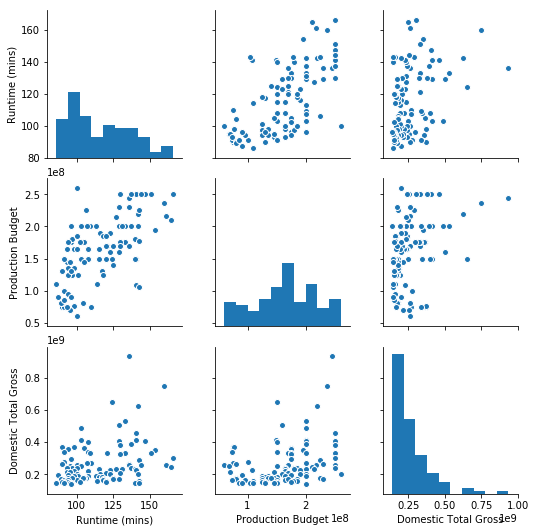

In [16]:
sns.pairplot(dtg_df)

In [19]:
corr = dtg_df.corr()
corr.shape

(3, 3)

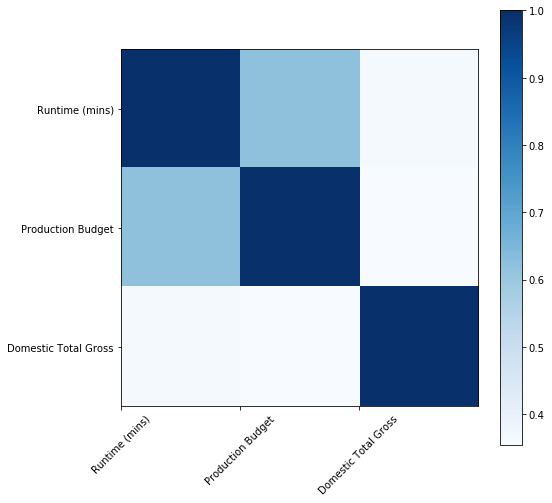

In [20]:
plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(corr, cmap='Blues', interpolation='nearest')
cbar = plt.colorbar()
plt.grid(False)
plt.yticks(np.arange(corr.shape[1]))
plt.xticks(np.arange(corr.shape[0])-0.5, rotation=45)
ax.set_xticklabels(list(dtg_df.columns), minor=False)
ax.set_yticklabels(list(dtg_df.columns), minor=False);

## Building Model - Linear Regression

In [46]:
X=dtg_df.loc[:,['Production Budget','Runtime']]

y=dtg_df['Domestic Total Gross']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
selected_columns_1 = ['Production Budget']

In [51]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lr_model1.coef_, lr_model1.intercept_

(array([ 0.86452633]), 115878990.54082376)

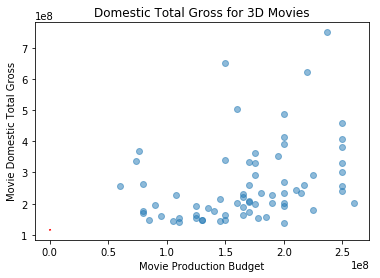

In [70]:
plt.scatter(X_train['Production Budget'],y_train,alpha=.5)
vec1 = np.linspace(0,400000,100000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Domestic Total Gross for 3D Movies")
plt.xlabel("Movie Production Budget")
plt.ylabel("Movie Domestic Total Gross")

In [56]:
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_1])
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

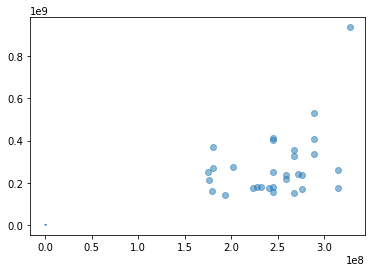

In [60]:
plt.scatter(test_set_pred1,y_test,alpha = 0.5)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

In [63]:
def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

adj_r2(r2_score(y_test,test_set_pred1),X_test.shape[0],X_test.shape[1])

0.035065532059331606

In [64]:
def standard_error_estimate(true,pred,num_data):
    sse = 0
    for y,ypred in zip(true,pred):
        sse += (y-ypred)**2
    return np.sqrt(sse/(num_data-2))

standard_error_estimate(y_test,test_set_pred1,X_test.shape[0])

151790424.59015915

In [65]:
def test_model_results(true, X, pred):
    print("Mean Squared Error: ", mean_squared_error(true,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
    print("Mean Absolute Error: ",mean_absolute_error(true,pred))
    r2 = r2_score(true,pred)
    print("R2: ", r2)
    print("Adj R2: ", adj_r2(r2,X.shape[0],X.shape[1]))
    print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
          
test_model_results(y_test, X_test, test_set_pred1)

Mean Squared Error:  2.15043107974e+16
Root Mean Squared Error:  146643481.947
Mean Absolute Error:  98005185.0036
R2:  0.101612736745
Adj R2:  0.0350655320593
Standard Error of Estimate:  151790424.59


In [71]:
lm1 = smf.ols('Domestic Total Gross ~ Production Budget', data=dtg_df)
fit1 = lm1.fit()
fit1.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# # Let's get these again and format them all in one swoop

# from pprint import pprint

# raw_release_date = get_movie_value(soup,'Release Date')
# release_date = to_date(raw_release_date)

# raw_domestic_total_gross = get_movie_value(soup,'Domestic Total')
# domestic_total_gross = money_to_int(raw_domestic_total_gross)

# raw_runtime = get_movie_value(soup,'Runtime')
# runtime = runtime_to_minutes(raw_runtime)

# headers = ['movie title', 'domestic total gross',
#            'release date', 'runtime (mins)', 'rating']

# movie_data = []
# movie_dict = dict(zip(headers, [title,
#                                 domestic_total_gross,
#                                 release_date,
#                                 runtime,
#                                 rating]))
# movie_data.append(movie_dict)

# pprint(movie_data)


In [2]:
url1 = 'http://www.boxofficemojo.com/movies/?id=starwars7.htm'

source_code1=requests.get(url1)
soup1 = BeautifulSoup(source_code1.text,"html5lib")

In [3]:
rating_string = soup1.find(text = re.compile('MPAA'))
rating_value = rating_string.findNextSibling()
rating_value.text

'PG-13'

In [107]:
soup1.find(text=re.compile('Close Date'))

In [9]:
for element in soup1.find_all(class_='mp_box_content'):
   print(element, '\n')

<div class="mp_box_content">
	<table border="0" cellpadding="0" cellspacing="0">
		<tbody><tr>
			<td width="40%"><b>Domestic:</b></td>
			<td align="right" width="35%"> <b>$936,662,225</b></td>
						<td align="right" width="25%">   <b>45.3%</b></td>
					</tr>
				<tr>
			<td width="40%">+ <a href="/movies/?page=intl&amp;id=starwars7.htm">Foreign:</a></td>
			<td align="right" width="35%"> $1,131,561,399</td>
			<td align="right" width="25%">   54.7%</td>
		</tr>
		<tr>
			<td colspan="3" width="100%"><hr/></td>
		</tr>
		<tr>
			<td width="40%">= <b>Worldwide:</b></td>
			<td align="right" width="35%"> <b>$2,068,223,624</b></td>
			<td width="25%"> </td>
		</tr>
			</tbody></table>
	</div> 

<div class="mp_box_content">
	
		<table border="0" cellpadding="0" cellspacing="0">
		<tbody><tr>
			<td align="center"><a href="/weekend/chart/?yr=2015&amp;wknd=51&amp;p=.htm">Opening Weekend:</a></td><td> $247,966,675</td></tr>
		<tr>
			<td align="center" colspan="2"><font size="2">(#1 rank, 

In [10]:
soup1.find(class_='mp_box_content').find_all('td')

[<td width="40%"><b>Domestic:</b></td>,
 <td align="right" width="35%"> <b>$936,662,225</b></td>,
 <td align="right" width="25%">   <b>45.3%</b></td>,
 <td width="40%">+ <a href="/movies/?page=intl&amp;id=starwars7.htm">Foreign:</a></td>,
 <td align="right" width="35%"> $1,131,561,399</td>,
 <td align="right" width="25%">   54.7%</td>,
 <td colspan="3" width="100%"><hr/></td>,
 <td width="40%">= <b>Worldwide:</b></td>,
 <td align="right" width="35%"> <b>$2,068,223,624</b></td>,
 <td width="25%"> </td>]

In [ ]:
#         info

#     for item in items:
        
#         print(item)
#     open_week_string = items[0]
      
    

# movies={}
# for row in rows:
#     items=row.find_all('td')
#     title=items[1].find('a')['href']
#     movies[title]=[i.text for i in items[1:]]
    

# list(movies.items())[1]

In [24]:
dtg_string = soup1.find(text=re.compile('Domestic Total'))
dtg = dtg_string.findNextSibling().text 
dtg = dtg.replace('$','').replace(',','')
domestic_total_gross = int(dtg)
print(domestic_total_gross)

936662225


In [273]:
soup1.center.find_all('td')[0].text

'Domestic Total Gross: $936,662,225'

In [249]:
center1 = []
for b in soup1.center.findAll('b'):
    center1.append(b.text)
center1  

['$936,662,225',
 'Buena Vista',
 'December 18, 2015',
 'Sci-Fi Fantasy',
 '2 hrs. 16 min.',
 'PG-13',
 '$245 million']

In [204]:
url2 = 'http://www.boxofficemojo.com/movies/?id=avatar.htm'

source_code3=requests.get(url2)
soup3 = BeautifulSoup(source_code3.text,"html5lib")


In [189]:
all2 = []
for b in soup3.findAll('b'):
    all2.append(b.text)
len(all2)

144

In [248]:
center3 = []
for b in soup3.center.findAll('b'):
    center3.append(b.text)
center3.    

['$749,766,139',
 'Domestic Lifetime Gross: $760,507,625',
 'Fox',
 'December 18, 2009',
 'Sci-Fi Adventure',
 '2 hrs. 40 min.',
 'PG-13',
 '$237 million']

In [ ]:
for add in addr[:50]:
    print(add)

In [156]:
import numpy as np
l = ['a1','b1','c1','a2','b2','c2','a3','b3','c3','a4','b4','c4','a5','b5','c5']
foo = np.array(l).reshape(-1,3)

In [170]:
foo_n = foo.T.tolist()

In [171]:
d = {}
d['names'] = foo_n[0]
d['colors'] = foo_n[1]
d['font'] = foo_n[2]
d

{'colors': ['b1', 'b2', 'b3', 'b4', 'b5'],
 'font': ['c1', 'c2', 'c3', 'c4', 'c5'],
 'names': ['a1', 'a2', 'a3', 'a4', 'a5']}